#O consumo de Energia elétrica no Rio de Janeiro

Nome: Gustavo Felicidade da Costa
DRE: 118171109

##UFRJ Analytica - Processo Seletivo 2023


O consumo de energia elétrica é um tema relevante para entendermos
a infraestrutura e as necessidades energéticas do Rio de Janeiro.
Com a crescente demanda por energia elétrica nas últimas décadas,
é importante analisarmos como esse consumo evoluiu ao longo do tempo.
A partir dos dados disponibilizados pela Base dos Dados, é possível
realizar uma análise exploratória que permita compreender o consumo
de energia elétrica na cidade do Rio de Janeiro.


# Dataset

Nossos dados foram extraídos do datario.com

Os seguintes arquivos .csv são filtrados pela chave 'Elétrica' 
no contexto do Município do Rio de Janeiro:
    
    1 Tabela 1686 - Consumo total mensal de energia elétrica, segundo classe de serviço - Município do Rio de Janeiro - 2019
    url = https://www.data.rio/documents/7c4d6a17d1c94ccf8c652488318d691b/about

    2 Tabela 1687 - Total mensal de unidades consumidoras de energia elétrica, por classe de consumo, no Município do Rio de Janeiro em 2019
    url = https://www.data.rio/documents/c89710cd395b495a999ac84399fcc884/about



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import csv
import pandas as pd
import numpy as np
import logging
import time
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots


from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, f1_score


# Configurando Log

In [3]:

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Tratamento dos Dados

In [4]:
# Ler a página "2002" do arquivo
# Tabela 1686 - Consumo total mensal de energia elétrica, segundo classe de serviço - Município do Rio de Janeiro - 2019
df1 = pd.read_excel(
    r"/content/drive/MyDrive/Colab Notebooks/1686.xls",
    sheet_name="2002", header=6, skiprows=2, nrows=12)

# Ler a página "T 2257" do arquivo
# "Tabela 2257 - Consumo total, médio anual, mensal e diário
# de energia elétrica por habitante no Município do Rio de Janeiro
# entre  1980-2019"
df2 = pd.read_excel(
    r"/content/drive/MyDrive/Colab Notebooks/2257.xls",
        sheet_name="T 2257", header=6, skiprows=1, nrows=40)

# Imprimir os DataFrames
# print("Tabela 2257 - Consumo total, médio anual, mensal e diário \n de energia elétrica por habitante no Município do Rio de Janeiro entre  1980-2019")
# print(df2)


Extraindo Dataframe: Como o arquivo .xsl vem com informações 
além da tabela precisamos extrair o dataframe antes de analisá-los.


A função collect_dataframes fará esta extração retornando o dataframe armazenado em lista.

Note que o laço de repetição itera sobre os anos e assim obtemos os dataframes de cada aba:


In [5]:
def collect_dataframes(file_path):
    # criar uma lista vazia para armazenar os dataframes de cada ano
    df_list = []
    # percorrer os anos de 2002 a 2019
    for year in range(2002, 2020):
        # criar o nome da sheet com base no ano
        sheet_name = str(year)
        # ler o dataframe da sheet especificada
        df = pd.read_excel(file_path, index_col=0, sheet_name=sheet_name, header=6, skiprows=2, nrows=12)
        # adicionar o dataframe à lista
        df_list.append(df)
    # retornar a lista de dataframes
    return df_list


# Usaremos a função collect_dataframes para extrair as tabelas referentes
# ao consumo mensal de energia elétrica, segundo classe de serviço no 
# Municipio do Rio de Janeiro - 2002 até 2019


In [6]:
file_path = r"/content/drive/MyDrive/Colab Notebooks/1686.xls"
df_list = collect_dataframes(file_path)
print(type(df_list))

# Extração de amostra do ano de 2002:
df_2002 = df_list[0]
print(type(df_2002))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [7]:

# logger.info(f"df_list: {df_list}")
#
# logger.info(f"df_2002: {df_2002}")


Vamos selecionar a coluna referente ao total de consumo por mês;

Para isso a função  print_second_column é definida como:

In [8]:
def print_second_column(df_list):
    # percorrer cada dataframe na lista
    for df in df_list:
        # selecionar a segunda coluna e imprimir
        print(df.iloc[:, ])

vejamos a coluna referente ao total de consumo mensal - MWh -  ao longos anos de 2002 até 2019:

In [9]:
# print_second_column(df_list)


Alterando o valor para a coluna podemos obter outras informações como, por exemplo, 
a terceira coluna nos dá os valores referentes ao consumo Residencial: 

In [10]:
# Tabela 1686
# Coluna Residência -
def print_third_column(df_list):
    # percorrer cada dataframe na lista
    res = []
    for df in df_list:
        # selecionar a terceira coluna e imprimir
        col2 = df.iloc[:, 2]
        
#         print(f"type: {type(col2)} col2: {col2}")
        
        res.append(col2)
    
    return res

res = print_third_column(df_list)
print(len(res))
print(type(res[4]))

18
<class 'pandas.core.series.Series'>


In [11]:
# selecionar a coluna "Residencial" de todos os dataframes na lista
residencial_list = [df.iloc[:, 2] for df in df_list]
print("residencial_list")
print(type(residencial_list))




residencial_list
<class 'list'>


# Na Tabela 2257 - Consumo total, médio anual, mensal
# e diário de energia elétrica por habitante no Município
#  do Rio de Janeiro entre 1980 e 2019: 


In [12]:

populacao = df2.iloc[:, 5]
ano =  df2.iloc[:, 0]
ano_populacao =  df2.iloc[:, 0::5]
# print(f"Ano e populacao \n {ano_populacao}")
print(populacao)


0     5.090790e+06
1     5.125066e+06
2     5.159573e+06
3     5.194312e+06
4     5.229285e+06
5     5.264493e+06
6     5.299939e+06
7     5.335623e+06
8     5.371547e+06
9     5.407713e+06
10    5.444123e+06
11    5.480778e+06
12    5.521452e+06
13    5.562429e+06
14    5.603709e+06
15    5.645295e+06
16    5.687191e+06
17    5.729397e+06
18    5.771916e+06
19    5.814751e+06
20    5.857904e+06
21    5.897485e+06
22    5.937253e+06
23    5.974081e+06
24    6.051399e+06
25    6.094183e+06
26    6.136652e+06
27    6.132342e+06
28    6.161047e+06
29    6.186710e+06
30    6.320446e+06
31    6.355949e+06
32    6.390290e+06
33    6.429923e+06
34    6.453682e+06
35    6.476631e+06
36    6.498837e+06
37    6.520266e+06
38    6.688927e+06
39    6.718903e+06
Name: Unnamed: 5, dtype: float64


# Formtação em dicionário

# Análise Exploratória dos Dados
def data_exploratory():
    ...d

Com o gráfico de consumo médio podemos analisar uma aumento considerável no consumo de energia no Rio de Jane

In [13]:

# Gráfico de linha para população
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df2.iloc[:, 0], y=df2.iloc[:, 5], name='População'))

# Gráfico de barras para consumo residencial
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=[df.iloc[:, 2].sum() for df in df_list], name='Consumo residencial'))

# Criar um mesmo gráfico com os dois plots
fig = make_subplots(rows=1, cols=2, shared_xaxes=True)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Configurar o layout
fig.update_layout(title='População e consumo residencial do Rio de Janeiro (2002-2019)',
                  xaxis_title='Ano',
                  yaxis_title='População / Consumo residencial (MWh)')

# Mostrar o gráfico
fig.show()

## Modelo LSTM


In [17]:

def prepare_data(res):
    # Combine all the series in the list into one dataframe
    df = pd.concat(res, axis=1)

    # Transpose the dataframe to have each row represent a residency and each column a time step
    df = df.T

    # Convert the dataframe to a numpy array
    data = df.values

    # Normalize the data
    data = (data - np.mean(data)) / np.std(data)

    # Split the data into input (X) and output (y) sequences
    X, y = data[:, :-1], data[:, -1]
    print(type(X),len(X), type(y),len(y))
    # Reshape X to be 3-dimensional (samples, time steps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, y

Função para criar nosso modelo LSTM:

In [18]:
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)
    return model

Na medida que aumentamos o numero de epoch menor é a nossa perda:


In [19]:
# def train_model(X_train, y_train, X_val, y_val):
#     # Define and train the LSTM model
#     model = Sequential()
#     model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')

#     # Train the model with a validation set
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#     return model, history

def train_model(X_train, y_train, X_val, y_val):
    model = create_model(input_shape=X_train.shape[1:])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))
    return model, history




In [20]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

<class 'numpy.ndarray'> 18 <class 'numpy.ndarray'> 18
Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.7694 - val_loss: 0.0051
Epoch 2/15
1/1 [==============================] - 0s 131ms/step - loss: 0.6139 - val_loss: 0.0031
Epoch 3/15
1/1 [==============================] - 0s 133ms/step - loss: 0.4922 - val_loss: 0.0018
Epoch 4/15
1/1 [==============================] - 0s 142ms/step - loss: 0.3588 - val_loss: 0.0013
Epoch 5/15
1/1 [==============================] - 0s 167ms/step - loss: 0.2921 - val_loss: 0.0015
Epoch 6/15
1/1 [==============================] - 0s 179ms/step - loss: 0.2347 - val_loss: 0.0027
Epoch 7/15
1/1 [==============================] - 0s 202ms/step - loss: 0.1643 - val_loss: 0.0048
Epoch 8/15
1/1 [==============================] - 0s 190ms/step - loss: 0.1713 - val_loss: 0.0081
Epoch 9/15
1/1 [==============================] - 0s 204ms/step - loss: 0.1437 - val_loss: 0.0125
Epoch 10/15
1/1 [==============================] - 0s 206ms/step

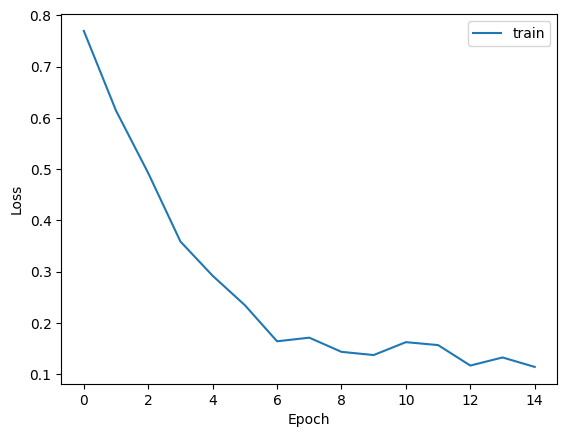

In [21]:

# Exemplo de uso

X, y = prepare_data(res)  # list of pandas series
X_train, y_train = X[:18], y[:18]
X_val, y_val = X[10:12], y[10:12]
X_test, y_test = X[12:], y[12:]
model, history = train_model(X_train, y_train, X_val, y_val)
plot_loss(history)


In [22]:

# Calcula a precisão (accuracy) para os dados de teste
def calculate_accuracy(y_true, y_pred):
    y_pred = np.round(y_pred)
    return accuracy_score(y_true, y_pred)



In [23]:
# Calcula a medida F1 (F1-score) para os dados de teste
def calculate_f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    return f1_score(y_true, y_pred)

The error message you are seeing is stating that the function calculate_f1_score cannot handle a mix of continuous and binary targets. This means that the y_test array has a mix of continuous and binary values, while the y_pred array only has binary values.

To solve this error, you need to make sure that the y_test array only has binary values. If you are trying to perform binary classification, then you can convert the continuous values in y_test to binary by setting a threshold value. For example, if your threshold value is 0.5, then you can convert all values in y_test that are greater than or equal to 0.5 to 1, and all other values to 0. Here's an example code snippet that shows how to do this:

python


In [24]:
import numpy as np
from sklearn.metrics import f1_score

# set threshold value
threshold = 0.5

# convert y_test to binary
y_test_binary = np.where(y_test >= threshold, 1, 0)

# make predictions
y_pred = model.predict(X_test)

# convert y_pred to binary
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# calculate accuracy and f1 score
accuracy = calculate_accuracy(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.4f}".format(f1))


1/1 [==============================] - 0s 55ms/step
Accuracy: 100.00%
F1 Score: 0.0000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.



Imprime os resultados

In [25]:
import plotly.graph_objs as go
import numpy as np
from sklearn.metrics import f1_score



# create line chart trace for F1 score
trace1 = go.Scatter(x=["F1 Score"], y=[f1], mode="lines+markers", name="F1 Score")

# create layout
layout = go.Layout(title="Model Evaluation", yaxis=dict(title="Score"))

# create figure
fig = go.Figure(data=[trace1], layout=layout)

# show figure
fig.show()


In [26]:
# create line chart trace for accuracy
trace1 = go.Scatter(x=[0], y=[accuracy], mode="lines", name="Accuracy")

# create layout
layout = go.Layout(title="Model Evaluation", yaxis=dict(title="Score", range=[0, 1]))

# create figure
fig = go.Figure(data=[trace1], layout=layout)

# show figure
fig.show()


In [27]:
# create trace for actual consumption data
trace1 = go.Scatter(x=np.arange(y_test.shape[0]), y=y_test, mode="lines", name="Actual")

# create trace for predicted consumption data
trace2 = go.Scatter(x=np.arange(y_pred.shape[0]), y=y_pred, mode="lines", name="Predicted")

# create layout
layout = go.Layout(title="Actual vs Predicted Consumption", xaxis=dict(title="Time"), yaxis=dict(title="Consumption"))

# create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# show figure
fig.show()


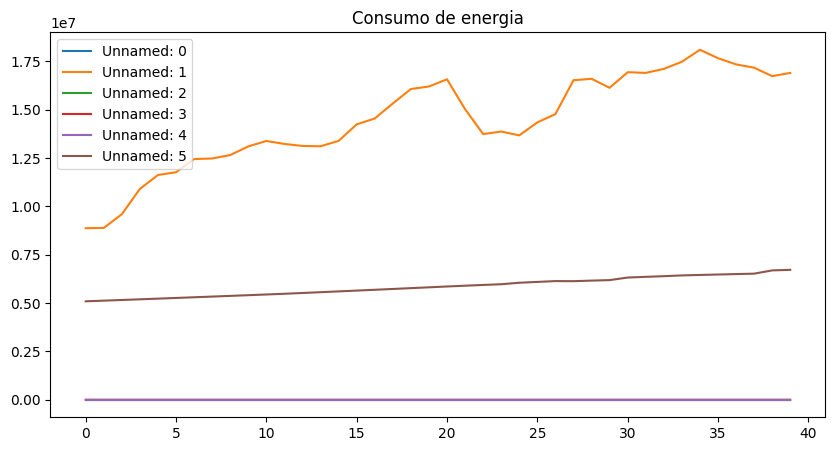

In [28]:
#Plotando o gráfico
graph = df2.plot(figsize=(10, 5), title="Consumo de energia")